# Lab 8: Define and Solve an ML Problem of Your Choosing

In [ ]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import re

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [3]:
# File name
airbnbListingsDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
df = pd.read_csv(airbnbListingsDataSet_filename, header=0)

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

I will be using the dataset of Airbnb listings. The target variable I will be predicting is the review scores value, which is a continuous measure reflecting guest satisfaction. This problem falls under supervised learning and is categorized as a regression problem, as I am predicting a continuous outcome. The features I will use in the model include numerical attributes like price and number of reviews, categorical attributes such as room type and property type, host is a superhost, and amenities. Predicting review scores is important as it can greatly enhance customer experience by identifying key factors influencing guest satisfaction, optimize pricing and marketing strategies by aligning them with predicted satisfaction levels, and help in maintaining high quality across listings. 

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [4]:
#inspecting data
df.head(100)
df.dtypes
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

name                         5
description                570
neighborhood_overview     9816
host_location               60
host_about               10945
host_response_rate       11843
host_acceptance_rate     11113
bedrooms                  2918
beds                      1354
dtype: int64

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

-I will use numerical features like price, number of bedrooms and bathrooms, number of reviews, availability, and host response rate. I will also include a binary feature indicating whether the host is a superhost and process the amenities text using TF-IDF vectorization to convert it into numerical data. Categorical features have been removed from the model.

-I will handle missing values by filling numerical features with their mean values and convert boolean features into binary form. Text data will be cleaned and transformed into numerical features. Additionally, I will scale numerical features to ensure they are on the same scale.

-The primary model will be a RandomForestRegressor, which is suitable for predicting continuous values like review scores. The data will be split into training and test sets. The model will be trained on the training set and evaluated using metrics like Mean Absolute Error, Mean Squared Error, and R-squared.

-I will use cross-validation to check the model’s performance on different parts of the data. 

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [5]:
# YOUR CODE HERE
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 


Generating Word Cloud for Amenities...


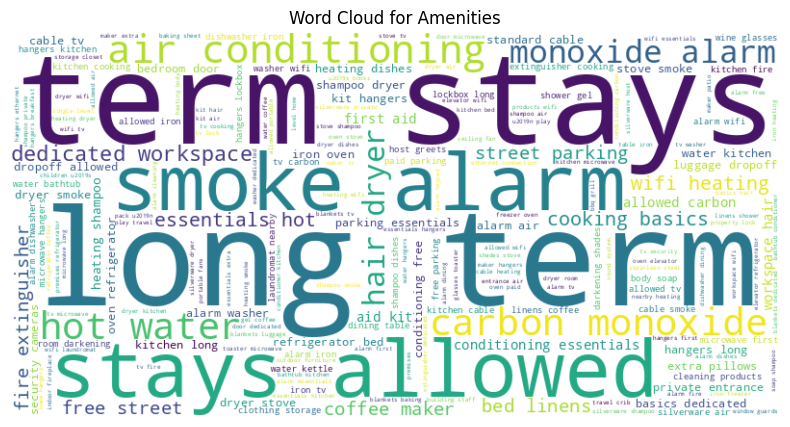


Actual vs Predicted Categories (First 20 Examples):
Actual: 4.73, Predicted: 4.710000000000001
Actual: 4.78, Predicted: 4.8706
Actual: 4.94, Predicted: 4.763599999999999
Actual: 4.2, Predicted: 4.5497000000000005
Actual: 4.74, Predicted: 4.680099999999999
Actual: 4.76, Predicted: 4.822200000000001
Actual: 4.0, Predicted: 4.9383
Actual: 4.86, Predicted: 4.6613999999999995
Actual: 4.69, Predicted: 4.727700000000001
Actual: 4.73, Predicted: 4.687500000000001
Actual: 4.89, Predicted: 4.399800000000002
Actual: 4.0, Predicted: 4.579899999999998
Actual: 4.87, Predicted: 4.811599999999999
Actual: 4.96, Predicted: 4.694799999999998
Actual: 4.73, Predicted: 4.547799999999999
Actual: 4.78, Predicted: 4.7908
Actual: 4.83, Predicted: 4.6718
Actual: 4.6, Predicted: 4.7835
Actual: 4.8, Predicted: 4.710700000000002
Actual: 5.0, Predicted: 4.226699999999999

Model Performance:
Mean Absolute Error: 0.31
Mean Squared Error: 0.26
R^2 Score: 0.03

Performing Cross-Validation...


In [ ]:
# YOUR CODE HERE
#handling missing values for numerical and categorical features
numerical_features = df.select_dtypes(include=[np.number]).columns
df[numerical_features] = df[numerical_features].fillna(df[numerical_features].mean())

categorical_features = df.select_dtypes(include=['object']).columns
for column in categorical_features:
    df[column].fillna(df[column].mode()[0], inplace=True)
    
#Transforming boolean features to binary
host_is_superhost_df = df['host_is_superhost'].astype(int)

#cleaning text data
df['amenities_cleaned'] = df['amenities'].apply(lambda x: re.sub(r'\W+', ' ', str(x).lower()))

##TF-IDF vectorization on "amenities_cleaned"
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df['amenities_cleaned'])
tfidf_features_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

#combining the numerical features
numerical_features = ['price', 'bedrooms', 'bathrooms', 'number_of_reviews', 'availability_365', 'host_response_rate', 'review_scores_value']
numerical_df = df[numerical_features]

#Combining all the features
df_combined = pd.concat([tfidf_features_df.reset_index(drop=True), numerical_df.reset_index(drop=True), host_is_superhost_df.reset_index(drop=True)], axis=1)

#Word cloud for amenities
print("\nGenerating Word Cloud for Amenities...")
all_amenities = ' '.join(df['amenities_cleaned'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_amenities)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Amenities')
plt.show()


#Splitting data into training sets
X = df_combined.drop('review_scores_value', axis=1)
y = df_combined['review_scores_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

best_model = RandomForestRegressor(
    n_estimators=100,   
    max_depth=None,     
    min_samples_split=2, 
    min_samples_leaf=1,  
    bootstrap=True,      
    random_state=1234   
)

# Train the best model
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Print examples of actual and predicted categories
print("\nActual vs Predicted Categories (First 20 Examples):")
for actual, predicted in zip(y_test[:20], y_pred[:20]):
    print(f"Actual: {actual}, Predicted: {predicted}")

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")